This code is based on Python 3.5.

I propose only the code version without chunck (the whole file is processed in a single step).

Using chunks only concerns the generation of "dfGroupDestMonth" which can be coded as in Exercise 2. The dataframe "dfGroupDestMonth" has a reasonable size.


In [29]:
# common parameters of the code
import pandas as pd 
import matplotlib.pyplot as plt
# to insert plot within the notebook
%matplotlib inline 

# List of target destinations: MADRID (MAD), BARCELONA (BCN) and MALAGA (AGP)
listTargetDestination=["MAD","BCN","AGP"] 
usedColumns = ['Date','Destination'] # column relevant for the processing
listMonthNumber=[1,2,3,4,5,6,7,8,9,10,11,12] # list of month numbers

I read the file and declare NaT (option errors='coerce') the dates uncorrectly formatted.

The correct format is '%Y-%m-%d'

In [30]:
parse = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')
df = pd.read_csv("searches.csv",sep='^', usecols=usedColumns, parse_dates=['Date'],date_parser=parse)


I count the number of searches per destination and per month.

The final result is a dataframe which is indexed by the month number between 1 and 12.

In [34]:
dfGroupDestMonth=df['Date'].groupby([df.Destination, df.Date.dt.month]).count().reset_index().set_index('Date')

# I count the number of searches for each target destination.
# A loop could be used but it seems useless since I have only three target destinations
# I reindex the dataframe in order to complete the months if one month has a null count 
# (in this case, the month does not appear in the dataframe 'dfGroupDestMonth')
# The value 0 is assigned to missing months (option "fill_value=0")
dfcount0 = dfGroupDestMonth[dfGroupDestMonth.Destination==listTargetDestination[0]].reindex(
    listMonthNumber, fill_value=0)# MAD
dfcount1 = dfGroupDestMonth[dfGroupDestMonth.Destination==listTargetDestination[1]].reindex(
    listMonthNumber, fill_value=0)# BCN
dfcount2 = dfGroupDestMonth[dfGroupDestMonth.Destination==listTargetDestination[2]].reindex(
    listMonthNumber, fill_value=0)# AGP

# I marge all the dataframes to obtain one final dataframe whose columns contains the 
# number of searches for each target destination
dftmp = pd.merge(dfcount0,dfcount1,left_index=True, right_index=True) # merge of two dataframes with indexes
dftmp = pd.merge(dftmp,dfcount2,left_index=True, right_index=True) # merge of two dataframes with indexes
dfDestinationCounts = dftmp.iloc[:,[1,3,5]] # This is the final dataframe


I plot the result with correct labeled axes

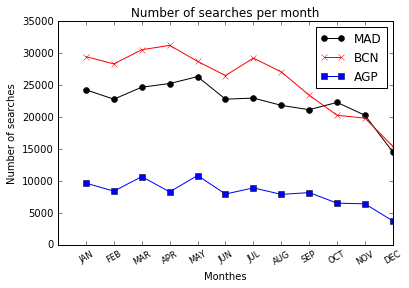

In [35]:
fig = plt.figure(); 
ax = fig.add_subplot(1, 1, 1)
ax.plot(dfDestinationCounts.ix[:,0], 'ko-', label=listTargetDestination[0])
ax.plot(dfDestinationCounts.ix[:,1], 'rx-', label=listTargetDestination[1])
ax.plot(dfDestinationCounts.ix[:,2], 'bs-', label=listTargetDestination[2])
ax.set_xlabel('Months') # set the x-label
ax.set_ylabel('Number of searches') # set the y-label
ax.set_title('Number of searches per month') # set the figure title
ax.legend(loc='best')
ticks = ax.set_xticks(listMonthNumber) # I plot all the monthes
labels = ax.set_xticklabels(['JAN', 'FEB', 'MAR', 'APR', 'MAY','JUN', 'JUL', 'AUG', 'SEP', 
                             'OCT','NOV', 'DEC'],rotation=30, fontsize='small')
